In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
with open('/content/tempo.txt', 'r') as file:
    lines = file.readlines()

for line in lines[:10]:
    print(line.strip())


Estatísticas de tempo para inserção de elementos no início da lista encadeada (1.000 inserções):
N = 100, Tempo total = 7 ms
N = 500, Tempo total = 26 ms
N = 1000, Tempo total = 34 ms
N = 5000, Tempo total = 158 ms
N = 10000, Tempo total = 275 ms
N = 50000, Tempo total = 1279 ms
N = 100000, Tempo total = 2605 ms
N = 500000, Tempo total = 13015 ms



In [ ]:
import re
import pandas as pd

# Listas para armazenar os dados
n_values = []
tempos_insercao_inicio = []
tempos_insercao_final = []
tempos_consulta = []

# Variável para rastrear a operação atual
operacao_atual = None

# Laço para percorrer as linhas e coletar os dados
for line in lines:
    # Identifica a operação
    if "inserção de elementos no início" in line:
        operacao_atual = "inicio"
    elif "inserção de elementos no final" in line:
        operacao_atual = "final"
    elif "consulta de elementos aleatórios" in line:
        operacao_atual = "consulta"
    elif "N = " in line:
        # Extrai N e Tempo
        match = re.search(r"N = (\d+), Tempo(?: total)? = (\d+)", line)
        if match:
            n = int(match.group(1))
            tempo = int(match.group(2))

            # Armazena os dados na lista correspondente à operação
            if operacao_atual == "inicio":
                n_values.append(n)
                tempos_insercao_inicio.append(tempo)
            elif operacao_atual == "final":
                tempos_insercao_final.append(tempo)
            elif operacao_atual == "consulta":
                tempos_consulta.append(tempo)

# Criar DataFrames para cada operação
df_insercao_inicio = pd.DataFrame({
    'N': n_values,
    'Tempo_Insercao_Inicio_ms': tempos_insercao_inicio
})

df_insercao_final = pd.DataFrame({
    'N': n_values,
    'Tempo_Insercao_Final_ms': tempos_insercao_final
})

df_consulta = pd.DataFrame({
    'N': n_values,
    'Tempo_Consulta_ms': tempos_consulta
})

# Exibir os DataFrames para verificar
print("Inserção no Início:")
print(df_insercao_inicio.head())
print("\nInserção no Final:")
print(df_insercao_final.head())
print("\nConsulta Aleatória:")
print(df_consulta.head())


Inserção no Início:
       N  Tempo_Insercao_Inicio_ms
0    100                         7
1    500                        26
2   1000                        34
3   5000                       158
4  10000                       275

Inserção no Final:
       N  Tempo_Insercao_Final_ms
0    100                        0
1    500                        1
2   1000                        2
3   5000                       23
4  10000                       95

Consulta Aleatória:
       N  Tempo_Consulta_ms
0    100                  2
1    500                  1
2   1000                  2
3   5000                  4
4  10000                  7


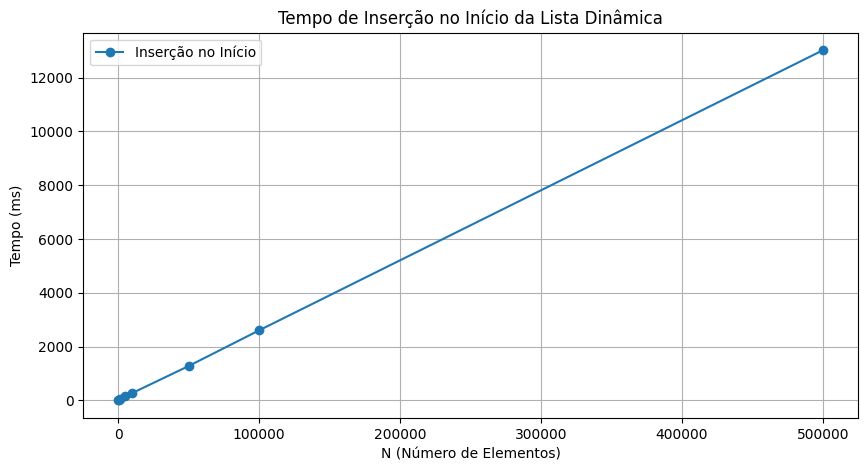

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_insercao_inicio['N'], df_insercao_inicio['Tempo_Insercao_Inicio_ms'], marker='o', label='Inserção no Início')
plt.xlabel('N (Número de Elementos)')
plt.ylabel('Tempo (ms)')
plt.title('Tempo de Inserção no Início da Lista Dinâmica')
plt.legend()
plt.grid(True)
plt.show()

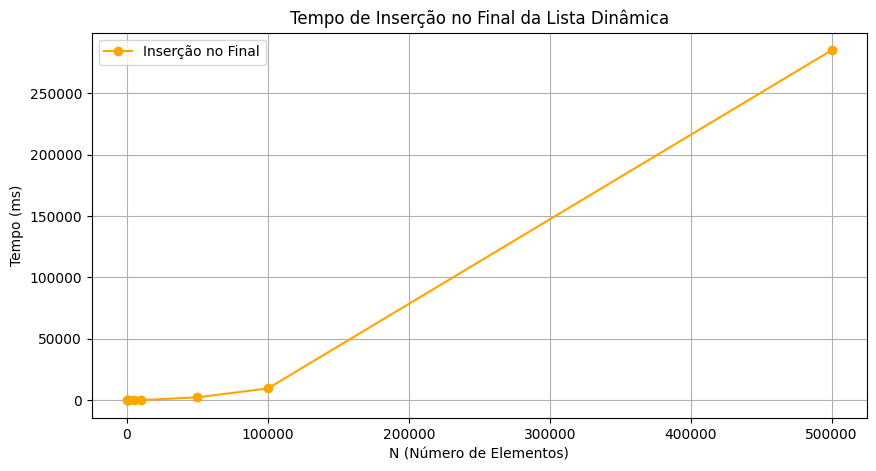

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_insercao_final['N'], df_insercao_final['Tempo_Insercao_Final_ms'], marker='o', color='orange', label='Inserção no Final')
plt.xlabel('N (Número de Elementos)')
plt.ylabel('Tempo (ms)')
plt.title('Tempo de Inserção no Final da Lista Dinâmica')
plt.legend()
plt.grid(True)
plt.show()

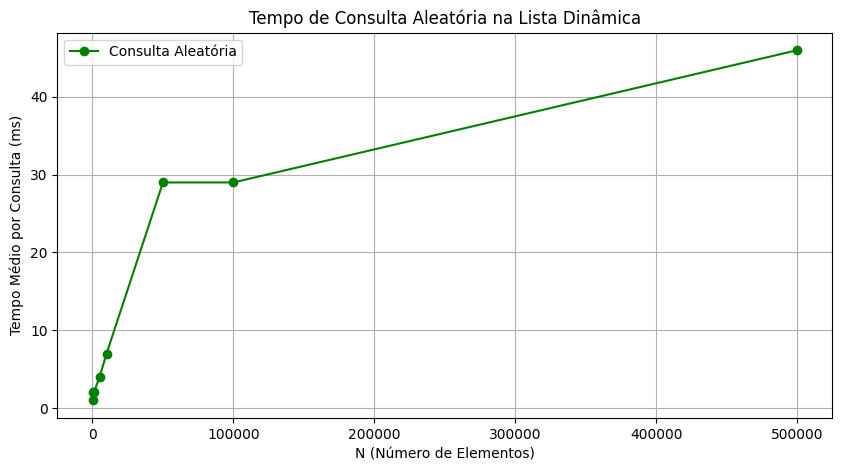

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_consulta['N'], df_consulta['Tempo_Consulta_ms'], marker='o', color='green', label='Consulta Aleatória')
plt.xlabel('N (Número de Elementos)')
plt.ylabel('Tempo Médio por Consulta (ms)')
plt.title('Tempo de Consulta Aleatória na Lista Dinâmica')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
tabela = pd.read_csv('complexidade_operacoes_listas.csv')
tabela

,Operação,Lista Estática (Array),Lista Dinâmica (Encadeada)
0,Inserção no Início,O(N),O(1)
1,Inserção no Final,O(1),O(N) (ou O(1) com 'tail')
2,Consulta Aleatória,O(1),O(N)
